# Twitter Scraping

In [1]:
!pip install tweepy

In [2]:
import tweepy
import pandas as pd
import numpy as np

In [3]:
consumer_key = 'WLpXq0qf6ocVTyzwaqVunbYpp'
consumer_secret = 'qV2tEsTQah2Ex4Y9PDcEWOuXScIWZ6H3yxRDmbqbh4SFZ7hUpa'

access_token = '1112290132726411264-Aq7I5l2iNRBZh6khM07pmcIQ6gvM0a'
access_secret = 'tfIHL8MVFDleMeF7azzc4my1MiPg1qPb55zZctyL1irgB'

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

## Scraping Modi's tweets

In [5]:
modi_tweets = api.user_timeline('narendramodi', page = 1, count = 200)
# Every page has only 200 tweets
len(modi_tweets)

200

In [6]:
modi_tweets[0].text # the first tweet of narendra modi

'Who knows the political wind better than a seasoned politician like Sharad Pawar Ji. \n\nFirst he said he will contes… https://t.co/i4guKToUVw'

In [7]:
modi_tweets[0].created_at

datetime.datetime(2019, 4, 1, 11, 12, 55)

In [8]:
modi_tweets[0]._json

{'created_at': 'Mon Apr 01 11:12:55 +0000 2019',
 'id': 1112674195786231808,
 'id_str': '1112674195786231808',
 'text': 'Who knows the political wind better than a seasoned politician like Sharad Pawar Ji. \n\nFirst he said he will contes… https://t.co/i4guKToUVw',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/i4guKToUVw',
    'expanded_url': 'https://twitter.com/i/web/status/1112674195786231808',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [117, 140]}]},
 'source': '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 18839785,
  'id_str': '18839785',
  'name': 'Chowkidar Narendra Modi',
  'screen_name': 'narendramodi',
  'location': 'India',
  'description': 'Prime Minister of India'

In [9]:
modi_tweets[0].source

'Twitter Media Studio'

In [10]:
modi_tweets[0].user.description

'Prime Minister of India'

In [11]:
print(modi_tweets[0].geo)

None


In [12]:
modi_tweets[0].user.location

'India'

In [13]:
modi_tweets[0].favorite_count

648

In [14]:
modi_tweets[0].retweet_count

156

In [15]:
df_modi_tweet = pd.DataFrame()
for tweet in modi_tweets:
    curr_tweet = {
        'text' : tweet.text,
        'likes' : tweet.favorite_count,
        'retweet' : tweet.retweet_count,
        'created_at' : tweet.created_at,
        'source' : tweet.source
    }
    df_modi_tweet = df_modi_tweet.append(curr_tweet, ignore_index = True)
df_modi_tweet.head()

,created_at,likes,retweet,source,text
0,2019-04-01 11:12:55,648.0,156.0,Twitter Media Studio,Who knows the political wind better than a sea...
1,2019-04-01 11:10:41,1098.0,287.0,Twitter Web Client,"In Wardha, the temperature was high but so was..."
2,2019-04-01 09:40:02,6754.0,2009.0,Periscope,Andhra Pradesh says in one voice- end TDP misr...
3,2019-04-01 08:40:45,11270.0,2830.0,Twitter for iPhone,This complex mission involved first flight of ...
4,2019-04-01 08:38:32,16627.0,4176.0,Twitter for iPhone,Congratulations to the scientists at @ISRO for...


In [16]:
df_modi = pd.DataFrame()
for page in range(1,21):
    modi_tweet = api.user_timeline('narendramodi', page = page, count = 200)
    
    for tweet in modi_tweet:
        curr_tweet = {
            'text' : tweet.text,
            'likes' : tweet.favorite_count,
            'retweet' : tweet.retweet_count,
            'created_at' : tweet.created_at,
            'source' : tweet.source
        }
        df_modi = df_modi.append(curr_tweet, ignore_index = True)
        
df_modi.head()

,created_at,likes,retweet,source,text
0,2019-04-01 11:12:55,704.0,170.0,Twitter Media Studio,Who knows the political wind better than a sea...
1,2019-04-01 11:10:41,1131.0,296.0,Twitter Web Client,"In Wardha, the temperature was high but so was..."
2,2019-04-01 09:40:02,6763.0,2013.0,Periscope,Andhra Pradesh says in one voice- end TDP misr...
3,2019-04-01 08:40:45,11277.0,2830.0,Twitter for iPhone,This complex mission involved first flight of ...
4,2019-04-01 08:38:32,16637.0,4176.0,Twitter for iPhone,Congratulations to the scientists at @ISRO for...


In [17]:
df_modi.shape

(3222, 5)

In [18]:
df_modi.to_csv('narendramodi_tweets.csv', index = False, encoding='utf-8')

In [19]:
import os
os.getcwd()

'D:\\Term 1\\Data Scraping\\Data Swaping'

# Twitter Analysis

In [20]:
df_modi['source'].value_counts()

Twitter Web Client      1635
Twitter Media Studio     742
Twitter for iPhone       537
Periscope                215
Twitter for Android       92
Twitter Ads Composer       1
Name: source, dtype: int64

In [21]:
df_modi.sort_values(by = 'retweet',ascending=False).head(10)


,created_at,likes,retweet,source,text
364,2019-03-01 16:34:29,271908.0,66467.0,Twitter for iPhone,Welcome Home Wing Commander Abhinandan!\n\nThe...
176,2019-03-16 03:30:15,160822.0,56413.0,Twitter Ads Composer,Your Chowkidar is standing firm &amp; serving ...
497,2019-02-14 13:16:57,130628.0,41244.0,Twitter for Android,Attack on CRPF personnel in Pulwama is despica...
493,2019-02-15 16:29:33,156902.0,37961.0,Twitter for iPhone,"We salute you, brave sons of Mother India. \n\..."
83,2019-03-27 07:11:27,122522.0,35315.0,Twitter Web Client,#MissionShakti is special for 2 reasons:\n(1) ...
87,2019-03-27 05:53:17,129189.0,33100.0,Twitter Web Client,"मेरे प्यारे देशवासियों, \n\nआज सवेरे लगभग 11.4..."
164,2019-03-17 15:29:12,115810.0,29845.0,Twitter for iPhone,Shri Manohar Parrikar was an unparalleled lead...
494,2019-02-15 06:21:54,101162.0,28525.0,Twitter Media Studio,A grateful nation bows to the martyrs of Pulwa...
172,2019-03-17 12:21:24,118305.0,28039.0,Twitter for iPhone,"Fellow Indians,\n\nHappy that #MainBhiChowkida..."
2798,2018-08-16 12:08:38,92639.0,27981.0,Twitter Web Client,"मैं नि:शब्द हूं, शून्य में हूं, लेकिन भावनाओं ..."


In [22]:
df_modi.sort_values(by = 'likes',ascending=False).head(10)


,created_at,likes,retweet,source,text
364,2019-03-01 16:34:29,271908.0,66467.0,Twitter for iPhone,Welcome Home Wing Commander Abhinandan!\n\nThe...
176,2019-03-16 03:30:15,160822.0,56413.0,Twitter Ads Composer,Your Chowkidar is standing firm &amp; serving ...
493,2019-02-15 16:29:33,156902.0,37961.0,Twitter for iPhone,"We salute you, brave sons of Mother India. \n\..."
497,2019-02-14 13:16:57,130628.0,41244.0,Twitter for Android,Attack on CRPF personnel in Pulwama is despica...
87,2019-03-27 05:53:17,129189.0,33100.0,Twitter Web Client,"मेरे प्यारे देशवासियों, \n\nआज सवेरे लगभग 11.4..."
83,2019-03-27 07:11:27,122522.0,35315.0,Twitter Web Client,#MissionShakti is special for 2 reasons:\n(1) ...
172,2019-03-17 12:21:24,118305.0,28039.0,Twitter for iPhone,"Fellow Indians,\n\nHappy that #MainBhiChowkida..."
164,2019-03-17 15:29:12,115810.0,29845.0,Twitter for iPhone,Shri Manohar Parrikar was an unparalleled lead...
374,2019-02-26 09:29:53,115404.0,26784.0,Twitter Media Studio,"सौगंध मुझे इस मिट्टी की, मैं देश नहीं झुकने दू..."
2796,2018-08-16 12:09:48,109263.0,27641.0,Twitter Web Client,"अटल जी आज हमारे बीच में नहीं रहे, लेकिन उनकी प..."


In [23]:
from datetime import date
df_modi['date'] = pd.to_datetime(df_modi['created_at'])
df_modi['date'].head()

0   2019-04-01 11:12:55
1   2019-04-01 11:10:41
2   2019-04-01 09:40:02
3   2019-04-01 08:40:45
4   2019-04-01 08:38:32
Name: date, dtype: datetime64[ns]

In [24]:
df_modi['date'].min()

Timestamp('2018-06-21 10:36:05')

In [25]:
df_modi['date'].max()

Timestamp('2019-04-01 11:12:55')

In [26]:
df_modi['hour'] = df_modi['date'].dt.hour
df_modi['hour'].value_counts()

14    539
13    425
15    310
12    277
16    221
11    200
10    172
8     165
2     138
9     137
3     126
7     103
5      82
4      82
6      75
1      52
17     46
18     42
0      13
19      8
20      5
22      2
21      1
23      1
Name: hour, dtype: int64

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)

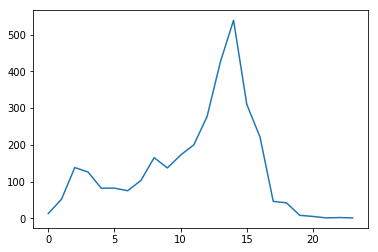

In [28]:
df_modi['hour'].value_counts().sort_index().plot.line()

In [29]:
#!pip install timezone

In [30]:
#from pytz import timezone
#indian = pytz.timezone('Asia/Calcutta')
#df_modi['hour_ist'].apply(lambda v:indian.localize(v)).dt.hour

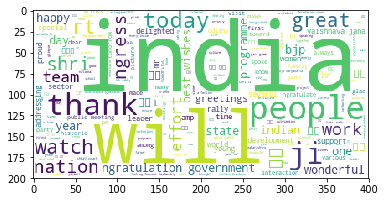

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
docs = df_modi['text'].str.lower()
docs = docs.str.replace('co','').str.replace('https','')
wc = WordCloud(background_color='white').generate(' '.join(docs))
plt.imshow(wc)

In [32]:
## Identity frequency of each hashtags used by modi
hashtag = []
for tweet in df_modi['text']:
    words = tweet.split(" ")
    for each_word in words:
        tag = each_word.startswith('#')
        if tag == True:
            hashtag.append(each_word)
hashtag

['#MainBhiChowkidar.\n\nA',
 '#MainBhiChowkidar',
 '#MainBhiChowkidar',
 '#MainBhiChowkidar',
 '#ModiSpeaksToBharat',
 '#ModiSpeaksToBharat',
 '#ModiSpeaksToBharat',
 '#ModiSpeaksToBharat',
 '#ModiSpeaksToBharat',
 '#ModiSpeaksToBharat',
 '#ModiSpeaksToBharat',
 '#ModiSpeaksToBharat',
 '#ModiSpeaksToBharat',
 '#ModiSpeaksToBharat',
 '#MissionShakti',
 '#MissionShakti',
 '#MissionShakti',
 '#VoteKar.',
 '#VoteKar.\n\nIn',
 '#MainBhiChowkidar',
 '#MainBhiChowkidar.\n\nMobilise',
 '#MainBhiChowkidar',
 '#MainBhiChowkidar',
 '#ChowkidarPhirSe',
 '#NewIndia4NariShakti',
 '#NewIndia4NariShakti',
 '#Kumbh2019,',
 '#Kumbh2019',
 '#Mahashivratri',
 '#LetsConclave19',
 '#BJPVijaySankalpBikeRally',
 '#MeraBoothSabseMazboot',
 '#News18RisingIndia',
 '#NationalWarMemorial',
 '#NationalWarMemorial',
 '#NationalWarMemorial',
 '#Kumbh.',
 '#PMKisan',
 '#PMKisan',
 '#MannKiBaat.',
 '#MannKiBaat',
 '#ETGBS',
 '#SeoulPeacePrize',
 '#MannKiBaat',
 '#CREDAIYouthCon2019.',
 '#DrugFreeIndia',
 '#MeraParivarB

In [33]:
len(hashtag)

279

In [34]:
hashtags = pd.Series(hashtag)
hashtags

0             #MainBhiChowkidar.\n\nA
1                   #MainBhiChowkidar
2                   #MainBhiChowkidar
3                   #MainBhiChowkidar
4                 #ModiSpeaksToBharat
5                 #ModiSpeaksToBharat
6                 #ModiSpeaksToBharat
7                 #ModiSpeaksToBharat
8                 #ModiSpeaksToBharat
9                 #ModiSpeaksToBharat
10                #ModiSpeaksToBharat
11                #ModiSpeaksToBharat
12                #ModiSpeaksToBharat
13                #ModiSpeaksToBharat
14                     #MissionShakti
15                     #MissionShakti
16                     #MissionShakti
17                          #VoteKar.
18                    #VoteKar.\n\nIn
19                  #MainBhiChowkidar
20     #MainBhiChowkidar.\n\nMobilise
21                  #MainBhiChowkidar
22                  #MainBhiChowkidar
23                   #ChowkidarPhirSe
24               #NewIndia4NariShakti
25               #NewIndia4NariShakti
26          

In [35]:
hashtags.value_counts()

#Gandhi150                             32
#MannKiBaat                            30
#ModiSpeaksToBharat                    10
#WorldTourismDay                        6
#MannKiBaat.                            6
#MainBhiChowkidar                       6
#AsianGames2018                         6
#IDY2018                                4
#InternationalYogaDay2018               4
#स्वच्छता_ही_सेवा                       4
#AsianGames2018.                        4
#Yoga                                   4
#NationalWarMemorial                    3
#SwachhataHiSeva                        3
#StatueOfUnity                          3
#IndependenceDayIndia                   3
#MissionShakti                          3
#SHS2018                                3
#MeraBoothSabseMazboot                  2
#PMKisan                                2
#MannKiBaat,                            2
#IndiaPostPaymentsBank.                 2
#NewIndia4NariShakti                    2
#WorldTourismDay.                 

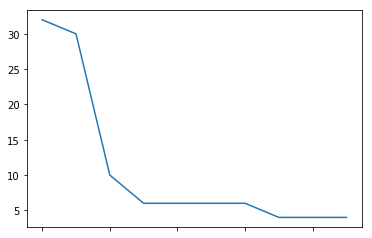

In [36]:
hashtags.value_counts().head(10).plot.line()

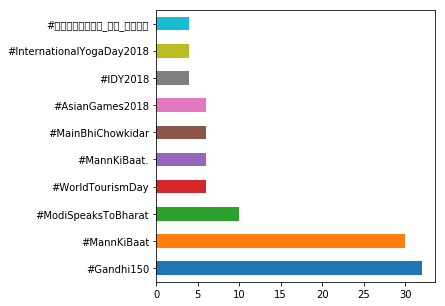

In [37]:
plt.rcParams['figure.figsize'] = (5,5)
hashtags.value_counts().head(10).plot.barh()

In [38]:
## What is the frequency of a hashtag across month

df_modi['month'] = df_modi['created_at'].dt.month_name()
df_modi.head()

,created_at,likes,retweet,source,text,date,hour,month
0,2019-04-01 11:12:55,704.0,170.0,Twitter Media Studio,Who knows the political wind better than a sea...,2019-04-01 11:12:55,11,April
1,2019-04-01 11:10:41,1131.0,296.0,Twitter Web Client,"In Wardha, the temperature was high but so was...",2019-04-01 11:10:41,11,April
2,2019-04-01 09:40:02,6763.0,2013.0,Periscope,Andhra Pradesh says in one voice- end TDP misr...,2019-04-01 09:40:02,9,April
3,2019-04-01 08:40:45,11277.0,2830.0,Twitter for iPhone,This complex mission involved first flight of ...,2019-04-01 08:40:45,8,April
4,2019-04-01 08:38:32,16637.0,4176.0,Twitter for iPhone,Congratulations to the scientists at @ISRO for...,2019-04-01 08:38:32,8,April


In [39]:
df_modi['MannKiBaat'] = df_modi['text'].apply(lambda text:1 if '#MannKiBaat' in text else 0)
df_modi.head()

,created_at,likes,retweet,source,text,date,hour,month,MannKiBaat
0,2019-04-01 11:12:55,704.0,170.0,Twitter Media Studio,Who knows the political wind better than a sea...,2019-04-01 11:12:55,11,April,0
1,2019-04-01 11:10:41,1131.0,296.0,Twitter Web Client,"In Wardha, the temperature was high but so was...",2019-04-01 11:10:41,11,April,0
2,2019-04-01 09:40:02,6763.0,2013.0,Periscope,Andhra Pradesh says in one voice- end TDP misr...,2019-04-01 09:40:02,9,April,0
3,2019-04-01 08:40:45,11277.0,2830.0,Twitter for iPhone,This complex mission involved first flight of ...,2019-04-01 08:40:45,8,April,0
4,2019-04-01 08:38:32,16637.0,4176.0,Twitter for iPhone,Congratulations to the scientists at @ISRO for...,2019-04-01 08:38:32,8,April,0


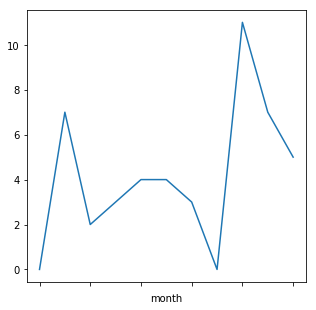

In [40]:
df_modi.groupby('month')['MannKiBaat'].sum().plot.line()

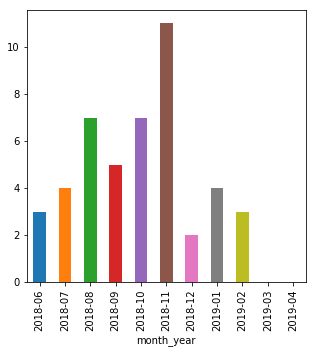

In [41]:
## What is the frequency of a hashtag across month

df_modi['month_year'] = df_modi['created_at'].dt.strftime('%Y-%m')
df_modi['MannKiBaat'] = df_modi['text'].apply(lambda text:1 if '#MannKiBaat' in text else 0)
df_modi.groupby('month_year')['MannKiBaat'].sum().plot.bar()

In [42]:
df_modi['day'] = df_modi['created_at'].dt.day
df_modi['weekday'] = df_modi['created_at'].dt.strftime('%A')
df_modi['hour'] = df_modi['created_at'].dt.hour
df_modi.head()

,created_at,likes,retweet,source,text,date,hour,month,MannKiBaat,month_year,day,weekday
0,2019-04-01 11:12:55,704.0,170.0,Twitter Media Studio,Who knows the political wind better than a sea...,2019-04-01 11:12:55,11,April,0,2019-04,1,Monday
1,2019-04-01 11:10:41,1131.0,296.0,Twitter Web Client,"In Wardha, the temperature was high but so was...",2019-04-01 11:10:41,11,April,0,2019-04,1,Monday
2,2019-04-01 09:40:02,6763.0,2013.0,Periscope,Andhra Pradesh says in one voice- end TDP misr...,2019-04-01 09:40:02,9,April,0,2019-04,1,Monday
3,2019-04-01 08:40:45,11277.0,2830.0,Twitter for iPhone,This complex mission involved first flight of ...,2019-04-01 08:40:45,8,April,0,2019-04,1,Monday
4,2019-04-01 08:38:32,16637.0,4176.0,Twitter for iPhone,Congratulations to the scientists at @ISRO for...,2019-04-01 08:38:32,8,April,0,2019-04,1,Monday


In [43]:
summary = df_modi.groupby(['month_year','day']).size().reset_index()
summary = summary.rename(columns = {0:'count'})
summary_pivot = summary.pivot_table(index = 'month_year',columns = 'day',values = 'count')
summary_pivot

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month_year,,,,,,,,,,,,,,,,,,,,,
2018-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,11.0,10.0,3.0,19.0,8.0,9.0,7.0,4.0,NaN
2018-07,9.0,3.0,2.0,9.0,2.0,5.0,6.0,2.0,8.0,8.0,...,7.0,7.0,10.0,8.0,10.0,7.0,5.0,18.0,5.0,2.0
2018-08,5.0,6.0,8.0,1.0,2.0,5.0,13.0,2.0,8.0,8.0,...,7.0,13.0,7.0,6.0,19.0,9.0,10.0,14.0,10.0,19.0
2018-09,13.0,6.0,7.0,49.0,25.0,3.0,5.0,2.0,1.0,7.0,...,11.0,8.0,2.0,16.0,6.0,22.0,8.0,13.0,20.0,NaN
2018-10,4.0,40.0,10.0,13.0,8.0,14.0,7.0,3.0,8.0,9.0,...,11.0,14.0,16.0,7.0,10.0,11.0,13.0,11.0,14.0,27.0
2018-11,11.0,15.0,7.0,7.0,14.0,10.0,9.0,6.0,10.0,7.0,...,6.0,12.0,16.0,26.0,21.0,19.0,13.0,5.0,14.0,NaN
2018-12,23.0,3.0,17.0,13.0,11.0,2.0,7.0,1.0,7.0,7.0,...,8.0,15.0,15.0,13.0,5.0,6.0,10.0,11.0,22.0,10.0
2019-01,4.0,9.0,13.0,13.0,12.0,5.0,1.0,14.0,13.0,3.0,...,8.0,13.0,31.0,15.0,8.0,15.0,15.0,17.0,13.0,2.0
2019-02,3.0,12.0,16.0,3.0,2.0,1.0,8.0,15.0,17.0,19.0,...,13.0,13.0,22.0,14.0,7.0,1.0,1.0,NaN,NaN,NaN


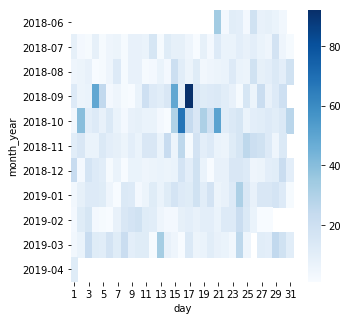

In [44]:
import seaborn as sns
sns.heatmap(summary_pivot,cmap = 'Blues')

In [45]:
summary = df_modi.groupby(['month_year','day'])['likes'].mean().reset_index()
summary_pivot = summary.pivot_table(index = 'month_year',columns = 'day',values = 'likes')
summary_pivot

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month_year,,,,,,,,,,,,,,,,,,,,,
2018-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13067.000000,9405.272727,7130.600000,11168.666667,10098.473684,8574.250000,12077.555556,12599.857143,9282.000000,NaN
2018-07,9949.444444,17226.333333,22010.500000,14390.555556,15365.500000,16585.600000,13411.666667,19650.500000,12856.500000,10319.625000,...,10568.714286,17377.428571,11662.300000,12124.375000,14282.400000,15707.714286,16222.200000,8551.222222,9483.800000,23137.500000
2018-08,8524.600000,10626.833333,10485.500000,23395.000000,18413.000000,11012.400000,9305.461538,22290.500000,14362.000000,7231.625000,...,17173.857143,12992.000000,14103.000000,18924.333333,16928.157895,15632.222222,13976.400000,11503.857143,13243.300000,9636.210526
2018-09,13348.692308,14430.833333,20431.571429,6245.163265,9189.200000,17572.333333,14745.800000,22822.000000,26125.000000,10336.142857,...,8834.454545,19922.500000,17487.000000,11578.187500,18140.333333,3932.000000,15043.500000,7081.538462,6955.350000,NaN
2018-10,16739.000000,7974.200000,9139.700000,11004.461538,9170.750000,8645.428571,9392.857143,23341.333333,8808.375000,16475.333333,...,7165.181818,5753.071429,8015.875000,7401.714286,8217.700000,5274.272727,10794.846154,7316.000000,10281.071429,8954.000000
2018-11,8856.909091,8107.600000,7869.000000,5934.714286,15442.500000,11500.400000,28199.333333,22321.000000,14887.000000,10811.285714,...,11533.000000,11978.583333,9619.375000,8153.423077,8140.190476,6257.473684,12237.153846,18290.600000,8335.214286,NaN
2018-12,9999.434783,18443.333333,10891.294118,11882.769231,15416.818182,21105.500000,18797.285714,26758.000000,13324.857143,23487.714286,...,11039.500000,11036.866667,6896.200000,17282.153846,10930.000000,18264.833333,10381.100000,11978.181818,10666.045455,8602.900000
2019-01,41352.750000,11270.000000,10558.846154,11785.307692,15240.583333,14955.400000,62836.000000,16114.785714,15782.538462,18560.000000,...,12061.000000,16542.153846,7986.419355,17857.000000,30878.750000,12636.000000,11311.533333,12092.764706,13641.230769,31696.500000
2019-02,28685.666667,15568.666667,14197.375000,22476.666667,26833.000000,25855.000000,18532.750000,12725.666667,11683.823529,14695.684211,...,14223.846154,17875.000000,19532.590909,20594.357143,55353.000000,40273.000000,34114.000000,NaN,NaN,NaN


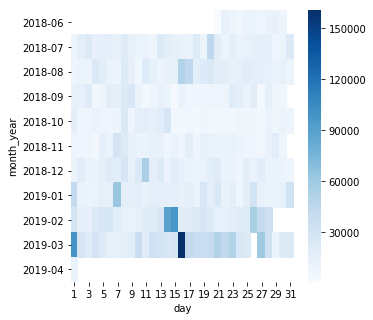

In [46]:
sns.heatmap(summary_pivot,cmap = 'Blues')

In [47]:
summary = df_modi.groupby(['month_year','day'])['retweet'].mean().reset_index()
summary_pivot = summary.pivot_table(index = 'month_year',columns = 'day',values = 'retweet')
summary_pivot

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month_year,,,,,,,,,,,,,,,,,,,,,
2018-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2525.000000,2198.727273,1677.300000,2862.666667,2711.894737,2070.625000,2823.333333,2837.428571,2775.750000,NaN
2018-07,2805.333333,3901.666667,5643.000000,3519.444444,2898.000000,3741.200000,3012.166667,4316.500000,2936.250000,2213.000000,...,2050.571429,3532.428571,2385.000000,2509.125000,3048.300000,3009.428571,3826.000000,2103.777778,1916.000000,5072.500000
2018-08,1929.200000,2239.500000,2497.125000,5583.000000,3997.000000,2462.200000,2517.230769,3801.500000,3206.375000,1646.375000,...,2843.285714,2386.076923,2424.428571,3301.500000,2975.631579,2794.666667,2478.700000,2442.285714,2354.200000,1936.157895
2018-09,2992.230769,2985.166667,3568.428571,1349.469388,1874.960000,3387.000000,3010.600000,3933.500000,4887.000000,2097.000000,...,1877.727273,4599.750000,3732.000000,2935.750000,3012.500000,1485.454545,3146.125000,1651.923077,1742.500000,NaN
2018-10,3084.750000,1841.900000,1964.600000,2447.153846,2048.000000,2462.071429,2180.714286,4501.333333,1943.250000,3685.111111,...,1619.272727,1475.571429,1927.875000,1620.571429,1789.500000,1201.636364,2343.153846,1701.818182,2585.285714,2292.111111
2018-11,1945.000000,2206.600000,1926.428571,1467.428571,3777.428571,2898.100000,5830.000000,3916.500000,3194.100000,2304.142857,...,2565.500000,2709.333333,2480.750000,2180.115385,2129.238095,1504.684211,2920.230769,4053.400000,1868.071429,NaN
2018-12,2110.086957,3274.666667,2646.235294,3048.076923,3695.272727,3632.500000,4068.571429,3985.000000,2018.571429,4156.571429,...,2459.625000,2451.400000,2165.733333,3611.461538,2022.200000,4305.666667,2090.900000,2879.181818,2479.545455,2053.300000
2019-01,7609.000000,2685.333333,2607.384615,2968.000000,3264.083333,3201.200000,10140.000000,3568.785714,3982.461538,3856.000000,...,2752.875000,3621.923077,1707.290323,4428.866667,6032.500000,2901.600000,2496.600000,2804.000000,2786.384615,6096.500000
2019-02,6504.333333,4093.916667,3544.687500,4370.333333,5931.000000,4596.000000,5828.625000,3424.133333,3141.941176,3943.526316,...,3997.307692,4534.923077,5595.181818,5359.214286,11627.571429,9175.000000,8651.000000,NaN,NaN,NaN


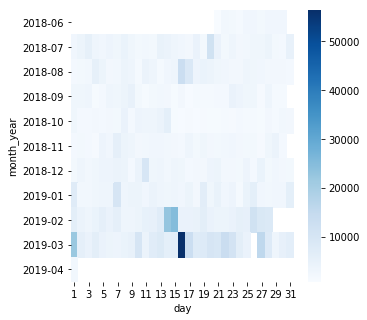

In [48]:
sns.heatmap(summary_pivot,cmap = 'Blues')

In [49]:
## Twitter Scraping 

In [50]:
tweets = api.search('#ModiMatBanao', count = 200)
len(tweets)

81

In [51]:
tweet_df = pd.DataFrame()
for tweet in tweets:
    #print(tweet.user.location)
    #print(tweet.user.name, tweet.user.screen_name)
    print(tweet.user.friends_count, tweet.user.description)
    print("------")

92 Nation First. Entrepreneur. Proud Indian 🤸 Jai Hind
------
53 
------
190 
------
122 Indian | Official Patriot |
Anti Truth | Shouting | Fluency in English , I never ever ever allow to talk others | FOLLOW BACK and RT |🇮🇳
------
14 I am indian&congressi
------
325 
------
1954 Liberal|Political Affairs|Businessman|Father|Libran|RT not endorsement but sometimes they are.
------
349 be simple as possible
------
267 
------
356 
------
1586 Author: Gudia, A Defiant Doll. Delhiite at ❤️ Mommy of a 19 yr old IndoRican. Nothing without His grace.
------
128 M beautiful Great Combination Beauty with Brain
------
132 Official Account Of Chhattisgarh Pradesh Congress Committee.
------
3231 Data Analyst | IYC INCHARGE for Loksabha Gautam Buddh Nagar | True Nehruvian | RT not endorsements.
------
477 SM coordinator odisha sevadal
------
727 Follow me 💯 Follow back         

Modi bhakts please excuse me.  I am not interested in hearing any of your views. I believe neither you are interested in

In [52]:
tweets_df = pd.DataFrame()
for tweet in tweets:
    curr_tweet = {
        'display_name' : tweet.user.name,
        'handler_name' : tweet.user.screen_name,
        'text' : tweet.text,
        'created_at' : tweet.created_at,
        'followers' : tweet.user.followers_count,
        'friends' : tweet.user.friends_count,
        'user_description' : tweet.user.description,
        'user_location' : tweet.user.location,
        'likes' : tweet.favorite_count,
        'retweets' : tweet.retweet_count
    }
    tweets_df = tweets_df.append(curr_tweet, ignore_index = True)
tweets_df

,created_at,display_name,followers,friends,handler_name,likes,retweets,text,user_description,user_location
0,2019-04-01 11:16:30,Chawkidar Pavans,110.0,92.0,PavansOfficialH,0.0,67.0,RT @hemanth_kgowda: Pakistan couldn’t divide I...,Nation First. Entrepreneur. Proud Indian 🤸 Jai...,
1,2019-04-01 11:16:29,Mohammed Athar,8.0,53.0,mohdathar88,0.0,807.0,RT @INCIndia: They really have put in a lot of...,,
2,2019-04-01 11:16:26,Salim kumar Bag,26.0,190.0,SalimkumarBag,0.0,802.0,"RT @dhruv_rathee: ""We never said we will jail ...",,"Patnagarh,Bolangir,INDIA"
3,2019-04-01 11:16:25,REPUBLEAK ⚕️,60.0,122.0,TheHind58892756,0.0,802.0,"RT @dhruv_rathee: ""We never said we will jail ...",Indian | Official Patriot |\nAnti Truth | Shou...,
4,2019-04-01 11:16:25,Nawab Ali,1.0,14.0,NawabAl53597677,0.0,3.0,RT @memishrasantosh: 15 लाख आए क्या खाते में?\...,I am indian&congressi,
5,2019-04-01 11:16:25,ruk,92.0,325.0,ruki27,0.0,79.0,RT @TheDesiEdge: 'Rahul Gandhi is contesting f...,,
6,2019-04-01 11:16:23,‎‏عاشق علی,437.0,1954.0,ASHIKismyname,0.0,0.0,@narendramodi #ModiMatBanao https://t.co/Yp0u4...,Liberal|Political Affairs|Businessman|Father|L...,Planet Earth 🌏
7,2019-04-01 11:16:22,digbijayn,41.0,349.0,dguu759125,0.0,802.0,"RT @dhruv_rathee: ""We never said we will jail ...",be simple as possible,
8,2019-04-01 11:16:21,Sudarshan,312.0,267.0,Sudarsh78723004,0.0,8.0,RT @IamAlok_Verma: In #ModiMatBanao what Modi ...,,
9,2019-04-01 11:16:20,Somesh Singh Chauhan,525.0,356.0,someshsinghIYC,0.0,0.0,#ModiMatBanao https://t.co/2SUbiTyKiC,,


In [71]:
tweets_df = pd.DataFrame()

for tweet in tweepy.Cursor(api.search, '#ModiMatBanao').items():
    curr_tweet = {
        'display_name' : tweet.user.name,
        'handler_name' : tweet.user.screen_name,
        'text' : tweet.text,
        'created_at' : tweet.created_at,
        'followers' : tweet.user.followers_count,
        'friends' : tweet.user.friends_count,
        'user_description' : tweet.user.description,
        'user_location' : tweet.user.location,
        'likes' : tweet.favorite_count,
        'retweets' : tweet.retweet_count
    }
    tweets_df = tweets_df.append(curr_tweet, ignore_index = True)
tweets_df.shape

TweepError: Twitter error response: status code = 429

In [72]:
tweets_df['user_location'].value_counts()

KeyError: 'user_location'

In [58]:
import requests

In [59]:
weather_api = 'fb7ed969b6a946ad88833025190204'
url = 'http://api.apixu.com/v1/current.json?key=fb7ed969b6a946ad88833025190204&q=Paris'

In [61]:
requests.get(url).json()

{'location': {'name': 'Paris',
  'region': 'Ile-de-France',
  'country': 'France',
  'lat': 48.87,
  'lon': 2.33,
  'tz_id': 'Europe/Paris',
  'localtime_epoch': 1554176101,
  'localtime': '2019-04-02 5:35'},
 'current': {'last_updated_epoch': 1554175811,
  'last_updated': '2019-04-02 05:30',
  'temp_c': 14.0,
  'temp_f': 57.2,
  'is_day': 0,
  'condition': {'text': 'Light rain',
   'icon': '//cdn.apixu.com/weather/64x64/night/296.png',
   'code': 1183},
  'wind_mph': 10.5,
  'wind_kph': 16.9,
  'wind_degree': 240,
  'wind_dir': 'WSW',
  'pressure_mb': 1009.0,
  'pressure_in': 30.3,
  'precip_mm': 1.1,
  'precip_in': 0.04,
  'humidity': 59,
  'cloud': 0,
  'feelslike_c': 12.7,
  'feelslike_f': 54.8,
  'vis_km': 10.0,
  'vis_miles': 6.0,
  'uv': 0.0,
  'gust_mph': 11.6,
  'gust_kph': 18.7}}

In [66]:
loc = list(tweets_df['user_location'].unique())
#url = 'http://api.apixu.com/v1/current.json?key=48e14086083349169a283707191103&q=%s' % loc

In [68]:
city_df = pd.DataFrame()
for city in loc:
    url = 'http://api.apixu.com/v1/current.json?key=48e14086083349169a283707191103&q=%s' % city
    result = requests.get(url).json()
    city_dist = {
        'Longitude':result['location']['lon'],
        'Latitude':result['location']['lat']
    }
    city_df = city_df.append(city_dist,ignore_index = True)
city_df

KeyError: 'location'

In [67]:
loc

['',
 'Pochampalli, India',
 'Mumbai/Hyderabad/NE',
 'India',
 'Kolkata, India',
 "Kobayashi's Place.",
 'New Delhi',
 'New Delhi, India',
 'MH50',
 'Mumbai',
 'odisha, india',
 'Jaunpur, India',
 'Darbhanga , India',
 'Jaipur, India',
 'Anand, India',
 'Aranthangi',
 'Ujjain, India',
 'Sitamarhi, India',
 'Delhi, India',
 'नई दिल्ली, भारत',
 'kushinagar',
 'Badarpur',
 'Nadiad , India',
 'Gurgaon, India',
 'ballia',
 'Lucknow, India',
 'पटना, बिहार, भारत',
 'Mumbai, India',
 'Narnaul, India',
 ' अकलतरा छत्तीसगढ़, भारत',
 'Rajasthan, India',
 'Chandigarh, India',
 'Bijnor, India',
 'Pune',
 'Ahmadabad City, India',
 'Global',
 'Surat, India',
 'Kushinagar',
 'Mira Road, Mumbai',
 'Ranchi, India',
 'सबक एक को सिख हम सब को ',
 'Hindostaan (not Hindustaan)',
 'Nashik, India',
 'Ludhiana, India',
 'Indiana, USA',
 'Madhya Pradesh, India',
 'New Delhi, Delhi',
 'Shimla Urban, India',
 'Mahisagar Gujarat ',
 'Bombay, India',
 'Anupgarh Vidhansbha Rajsthan',
 'Rajkot, India',
 'South Africa',